In [1]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd
import numpy as np
import os
from scipy.stats import linregress
import scipy.stats as st

import matplotlib.ticker as ticker

In [2]:
# Use os.join.path so any OS can run this code
coal_path = os.path.join("..", "Cleaned Data", "coal_consumption.csv")
natural_gas_path = os.path.join("..", "Cleaned Data", "natural_gas_consumption.csv")
nuclear_path = os.path.join("..", "Cleaned Data", "nuclear_consumption.csv")
petroleum_path = os.path.join("..", "Cleaned Data", "petroleum_consumption.csv")
world_pop_path = os.path.join("..", "Cleaned Data", "world_population_clean.csv")
total_consumption = os.path.join("..", "Cleaned Data", "total_consumption.csv")
pop_density = os.path.join("..", "Cleaned Data", "population_density_clean.csv")

# Read the csv into a data frame and display the first few rows of one of the data frames
coal = pd.read_csv(coal_path)
natural_gas = pd.read_csv(natural_gas_path)
nuclear = pd.read_csv(nuclear_path)
petroleum = pd.read_csv(petroleum_path)
world = pd.read_csv(world_pop_path)
total = pd.read_csv(total_consumption)
pop_density_df = pd.read_csv(pop_density)
coal.head()

,total energy consumption from coal (quad Btu),1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,World,92.61898154,95.64405155,98.6790131,97.63128798,101.1496542,90.98777896,88.3269182,88.50403542,89.04034491,...,142.0802631,144.317679,144.7411719,154.1538668,163.4665458,169.5297013,172.9542668,172.2478228,168.4392041,165.8359358
1,Afghanistan,0.003333443,0.003479281,0.002875095,0.00264592,0.002187572,0.001958398,0.000166672,0.000145838,0.000125004,...,0.005062667,0.007229405,0.010417009,0.015104664,0.03083431,0.025834152,0.028063389,0.031613501,0.028438401,0.03537612
2,Albania,0.03566854,0.037287502,0.037487996,0.037114729,0.032372883,0.018421893,0.00523497,0.003465617,0.002812836,...,0.002359147,0.002858442,0.003923002,0.003524944,0.003311342,0.002968888,0.00264252,0.003339684,0.002822255,0.00219942
3,Algeria,0.041970513,0.045400039,0.045428177,0.041014686,0.028252183,0.031485003,0.029095597,0.022630099,0.022967504,...,0.015373496,0.01567704,0.003821761,7.96356E-05,5.65193E-05,0.00033495,0.001109634,0.001079212,0.000698246,0.000697224
4,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Define a function that takes in a data frame and returns the x and y values to plot
def plot(df, country):

    # Grab all the column names
    x = df.columns

    # Set the energy consumption type
    world_consumption = x[0]

    # Run a loop to get all the years into a list for the y axis
    years = [x[name] for name in range(1, len(x))]

    # Get the values for the data stored in the World row and create a list to use for plotting
    energy_consumption = df.loc[df[world_consumption] == country,"1986":"2016"].values.flatten().tolist()

    # Run a loop to round the values in the list
    energy_consumption = [round(float(value),2) for value in energy_consumption]

    # Return the lists to plot with
    return years, energy_consumption

In [4]:
# Call the function to get the values required to plot
coal_x, coal_y = plot(coal, "World")
natural_x, natural_y = plot(natural_gas, "World")
nuclear_x, nuclear_y = plot(nuclear, "World")
petroleum_x, petroleum_y = plot(petroleum, "World")
world_x, world_y = plot(world, "World")

# Since the world population file is slight different, remove the first column header
del world_x[0]

# Create a rounded list of values for world population to see differences on the plot
world_y = [round(value/1000000000,2) for value in world_y]

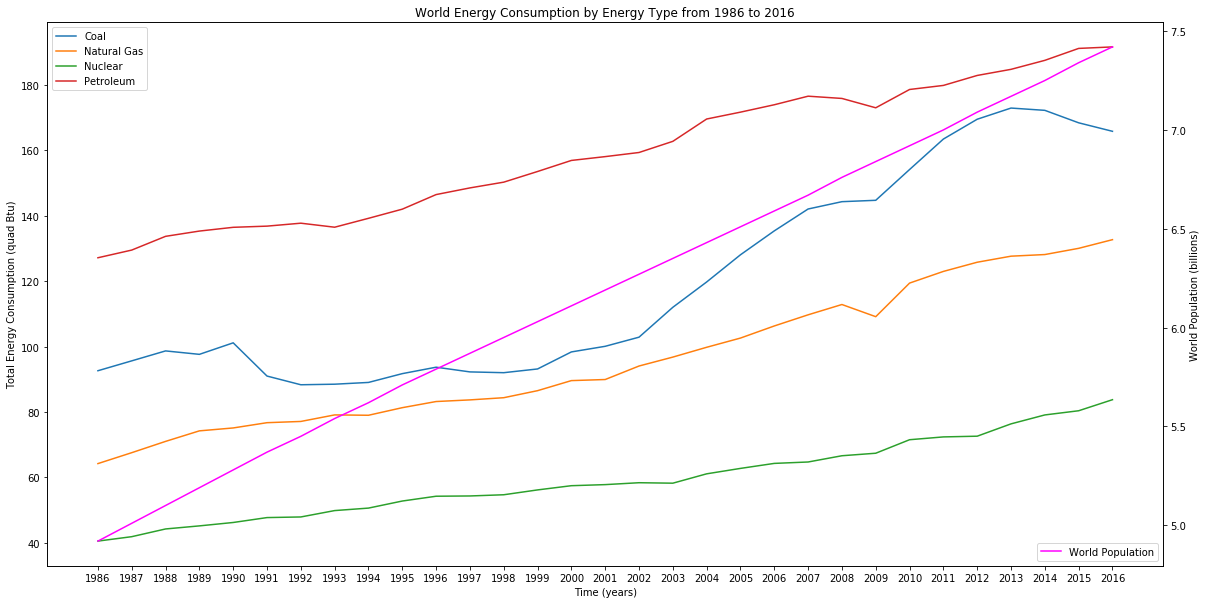

In [5]:
# Make adjustments for plot size, plot each line, add legend, add title and axis labels, etc
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(coal_x, coal_y)
ax1.plot(natural_x, natural_y)
ax1.plot(nuclear_x, nuclear_y)
ax1.plot(petroleum_x, petroleum_y)
ax1.set_ylabel("Total Energy Consumption (quad Btu)")
ax1.set_xlabel("Time (years)")
ax1.legend(labels=["Coal", "Natural Gas", "Nuclear", "Petroleum"], loc=2)

# Create a second plot over the first one for world population
ax2 = ax1.twinx()
ax2.plot(world_x, world_y, color="magenta")
ax2.set_ylabel("World Population (billions)")
ax2.legend(labels=["World Population"], loc=4)
plt.title("World Energy Consumption by Energy Type from 1986 to 2016");

# Save the image as a png
plt.savefig("../Images/World Energy Consumption by Energy Type.png")

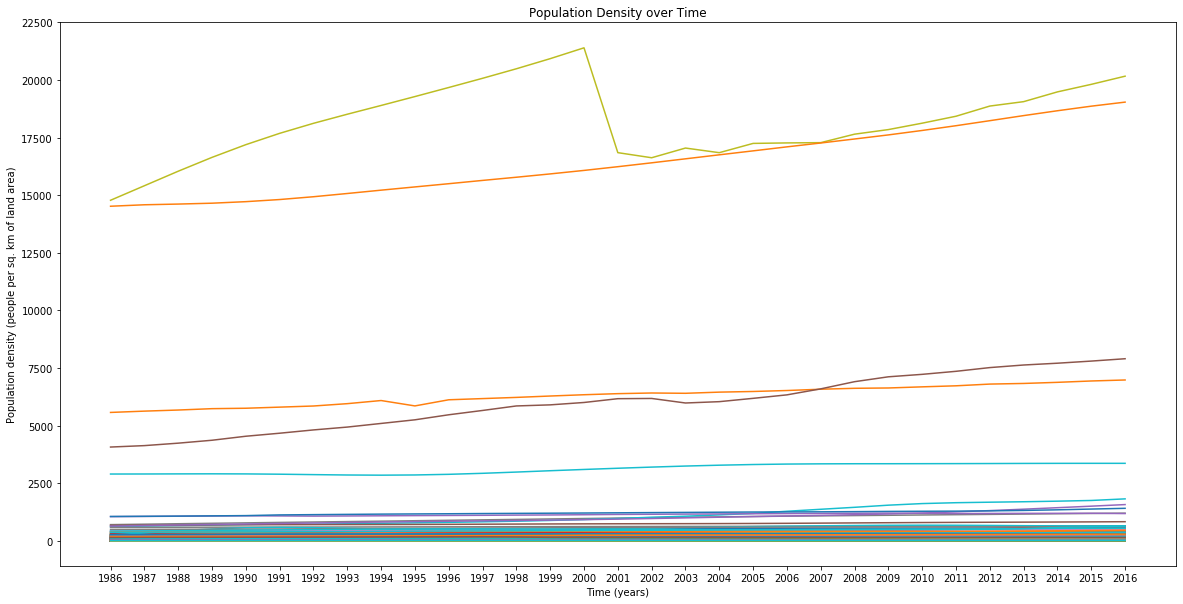

In [6]:
# Plot all of the data as a line plot showing years on the x-axis and change in population density on the y-axis
plt.figure(figsize=(20,10))
for country in pop_density_df["Country Name"]:
    pop_x, pop_y = plot(pop_density_df, country)
    del pop_x[0]
    plt.plot(pop_x, pop_y)
plt.yticks(np.arange(0, 25000, 2500))
#plt.grid(axis="x")
plt.ylabel("Population density (people per sq. km of land area)")
plt.xlabel("Time (years)")
plt.title("Population Density over Time");

In [7]:
# Since it appears as though most of the countries don't really change too much, let's look at the top 5 countries with the largest change

# Get a list of the column headers
x = pop_density_df.columns

# Create a new dataframe and set the columns
top_5 = pd.DataFrame(columns=x)

# Create a list of starting values from the first year in the data
starting_year = pop_density_df["1986"].tolist()

# Find the top 5 highest starting populations and store them in a data frame
for x in range(0,5):
    max_value = max(starting_year)
    top_5 = top_5.append(pop_density_df.loc[pop_density_df["1986"] == max_value])
    starting_year.remove(max_value)

# Find the top 5 lowest starting populations and store them in a data frame
for x in range(0,5):
    min_value = min(starting_year)
    top_5 = top_5.append(pop_density_df.loc[pop_density_df["1986"] == min_value])
    starting_year.remove(min_value)

# Display the data frame
top_5_rename = top_5.set_index("Country Name")
top_5_rename = top_5_rename.rename({"Macao SAR, China": "Macau", "Hong Kong SAR, China": "Hong Kong"}, axis="index")
top_5_rename = top_5_rename.reset_index()
top_5_rename

,Country Name,Country Code,1986,1987,1988,1989,1990,1991,1992,1993,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Macau,MAC,14779.550000,15409.000000,16038.650000,16639.150000,17190.400000,17681.300000,18115.550000,18509.950000,...,17277.773521,17645.170772,17844.067508,18121.851677,18422.474858,18864.180542,19055.181698,19478.812065,19805.427880,20159.079200
1,Monaco,MCO,14520.500000,14584.000000,14614.500000,14652.500000,14719.000000,14811.000000,14932.500000,15073.000000,...,17262.500000,17436.000000,17613.000000,17806.000000,18012.000000,18230.000000,18450.500000,18661.000000,18859.000000,19035.000000
2,Hong Kong,HKG,5580.404040,5636.868687,5684.444444,5743.636364,5762.121212,5810.101010,5859.090909,5960.606061,...,6586.952381,6626.476190,6640.761905,6689.714286,6734.857143,6809.619048,6837.047619,6885.238095,6944.095238,6987.238095
3,Singapore,SGP,4079.661194,4141.476119,4247.922388,4374.479104,4547.958209,4679.228358,4821.937313,4945.479104,...,6602.300719,6913.422857,7125.104286,7231.812280,7363.193022,7524.698463,7636.721687,7714.702232,7806.772752,7908.720563
4,Gibraltar,GIB,2909.400000,2911.500000,2915.900000,2918.700000,2914.700000,2902.200000,2884.000000,2867.500000,...,3351.700000,3355.900000,3356.500000,3358.500000,3361.200000,3364.600000,3369.200000,3372.500000,3373.600000,3373.700000
5,Greenland,GRL,0.156570,0.158326,0.160375,0.161838,0.162716,0.162423,0.161838,0.161545,...,0.137788,0.137235,0.137223,0.138641,0.138604,0.138409,0.137612,0.137154,0.136713,0.136889
6,Mongolia,MNG,1.272117,1.308829,1.345114,1.378132,1.405897,1.427635,1.444099,1.456774,...,1.669598,1.694108,1.721077,1.750751,1.783235,1.818210,1.854960,1.892497,1.930044,1.967326
7,Namibia,NAM,1.506065,1.562994,1.623409,1.683502,1.740462,1.793278,1.842556,1.888886,...,2.437190,2.481986,2.527717,2.573667,2.619613,2.665870,2.712908,2.761396,2.811772,2.864168
8,Mauritania,MRT,1.775177,1.823773,1.872934,1.922867,1.973752,2.025722,2.078825,2.133047,...,3.107128,3.198058,3.292334,3.390118,3.491460,3.596152,3.703788,3.813812,3.925780,4.039521
9,Botswana,BWA,1.960269,2.037842,2.117529,2.195903,2.270492,2.340307,2.406003,2.468742,...,3.309264,3.380162,3.446964,3.506264,3.556194,3.598805,3.639363,3.685378,3.742022,3.811240


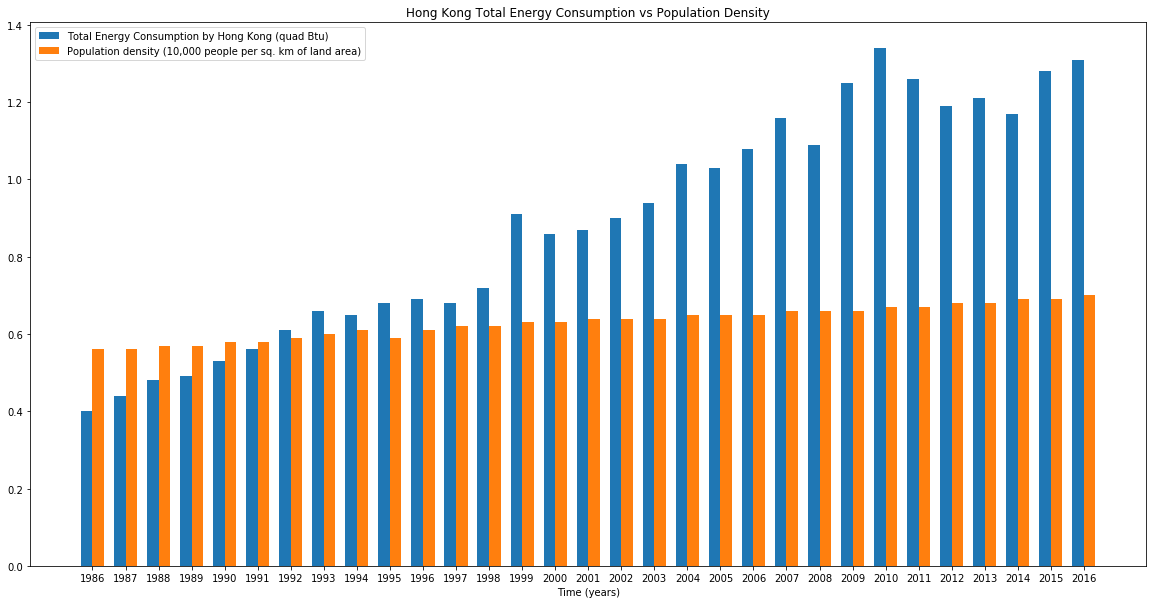

In [8]:
# Find total consumption and population density data
total_x, total_y = plot(total, "Hong Kong")
top_5_x, top_5_y = plot(top_5_rename, "Hong Kong")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
top_5_y = [round(value/10000,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,10))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by Hong Kong (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (10,000 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('Hong Kong Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

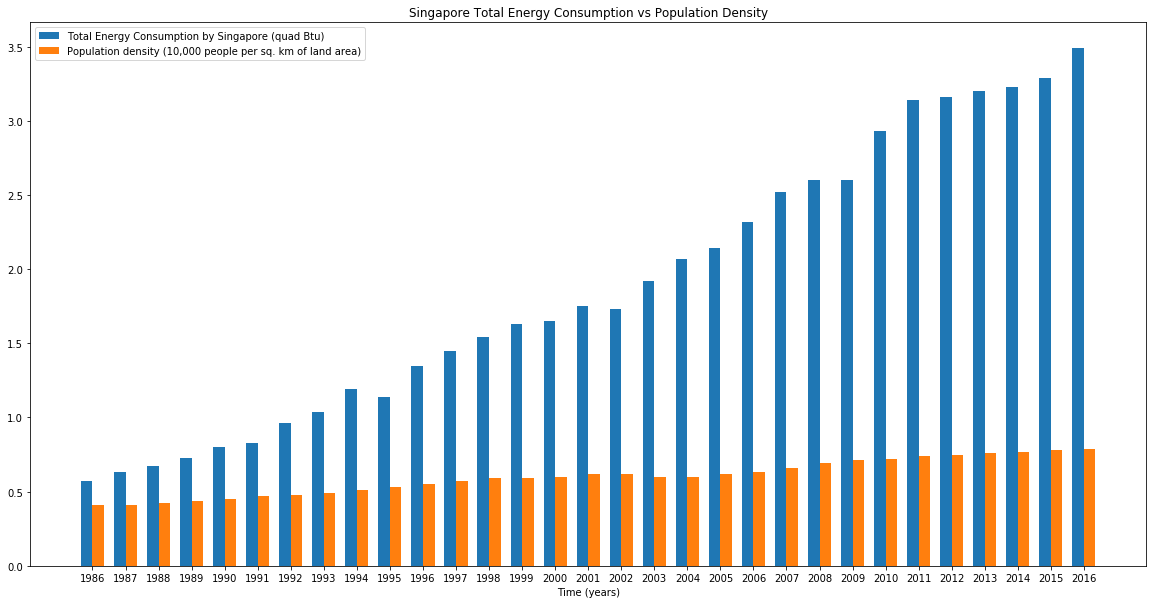

In [9]:
# Find total consumption and population density data
total_x, total_y = plot(total, "Singapore")
top_5_x, top_5_y = plot(top_5_rename, "Singapore")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
top_5_y = [round(value/10000,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,10))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by Singapore (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (10,000 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('Singapore Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

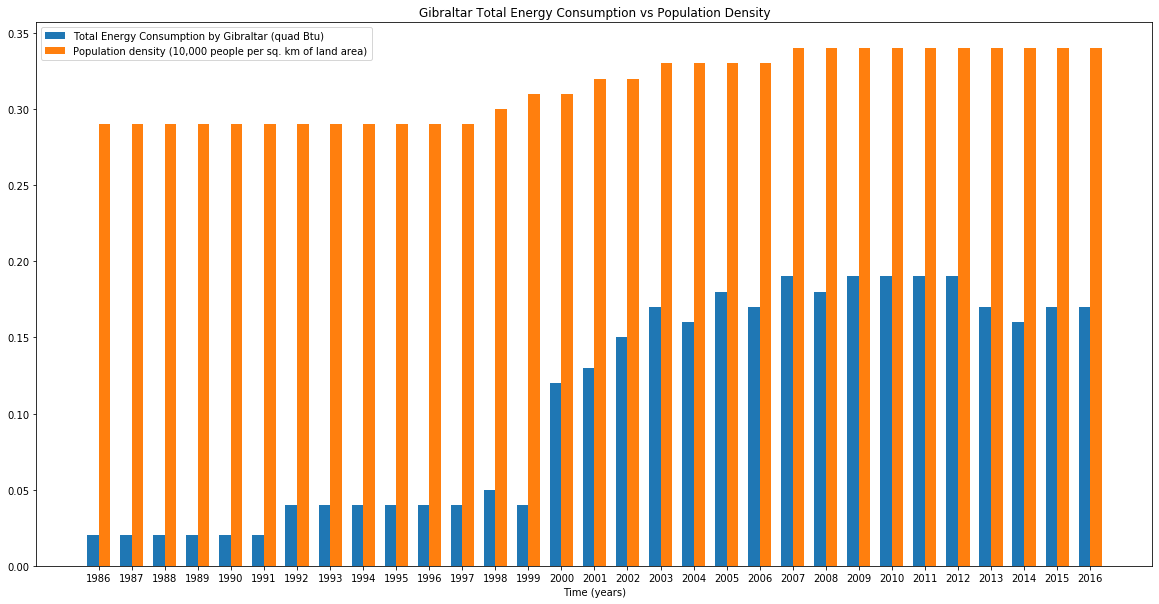

In [10]:
# Find total consumption and population density data
total_x, total_y = plot(total, "Gibraltar")
top_5_x, top_5_y = plot(top_5_rename, "Gibraltar")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
top_5_y = [round(value/10000,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,10))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by Gibraltar (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (10,000 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('Gibraltar Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

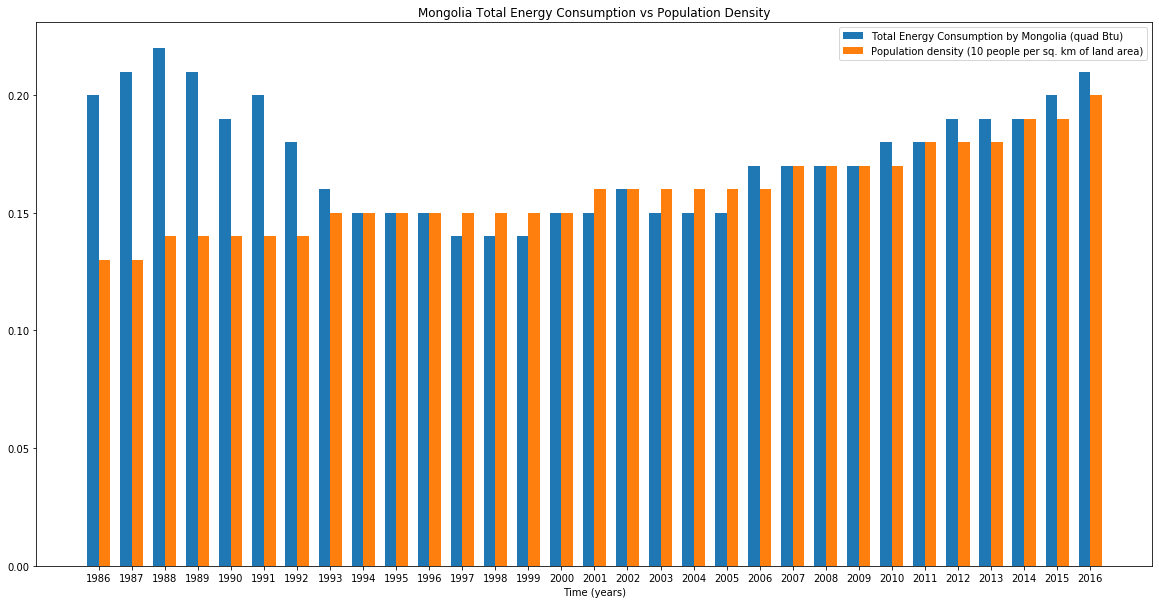

In [11]:
# Find total consumption and population density data
total_x, total_y = plot(total, "Mongolia")
top_5_x, top_5_y = plot(top_5_rename, "Mongolia")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
top_5_y = [round(value/10,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,10))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by Mongolia (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (10 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('Mongolia Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

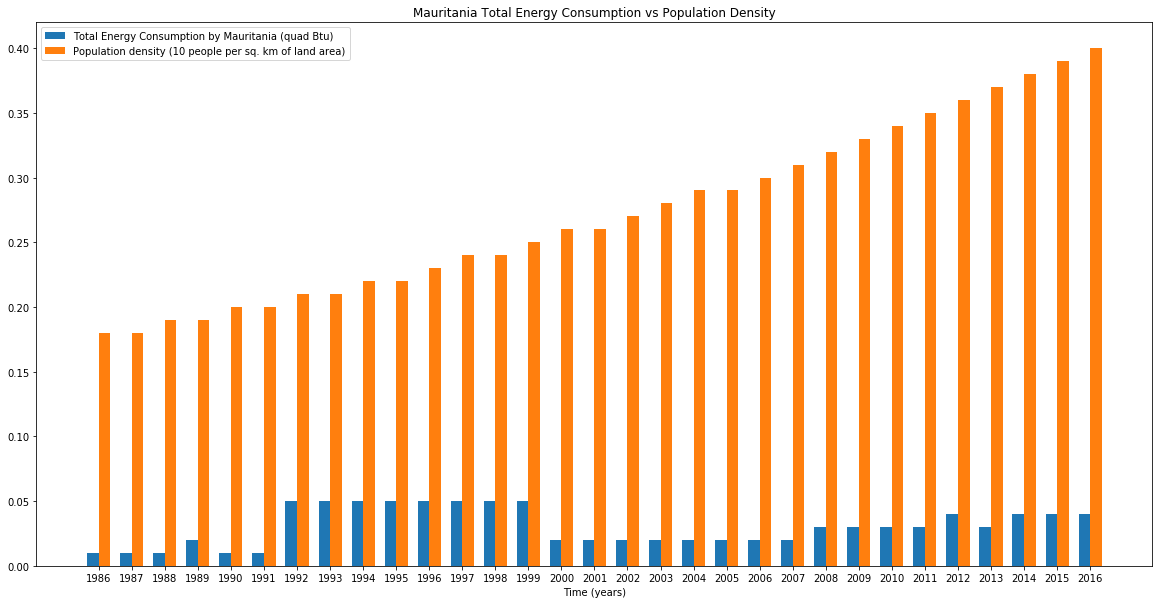

In [12]:
# Find total consumption and population density data
total_x, total_y = plot(total, "Mauritania")
top_5_x, top_5_y = plot(top_5_rename, "Mauritania")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
top_5_y = [round(value/10,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,10))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by Mauritania (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (10 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('Mauritania Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

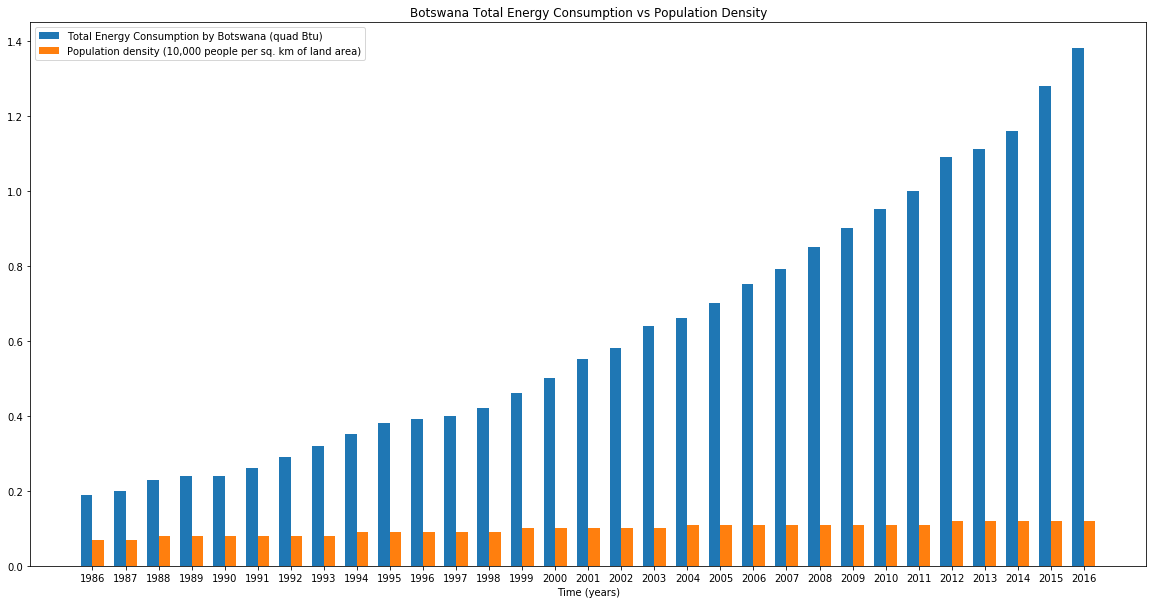

In [13]:
# Find total consumption and population density data
total_x, total_y = plot(total, "Bangladesh")
top_5_x, top_5_y = plot(pop_density_df, "Bangladesh")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
top_5_y = [round(value/10000,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,10))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by Botswana (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (10,000 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('Botswana Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

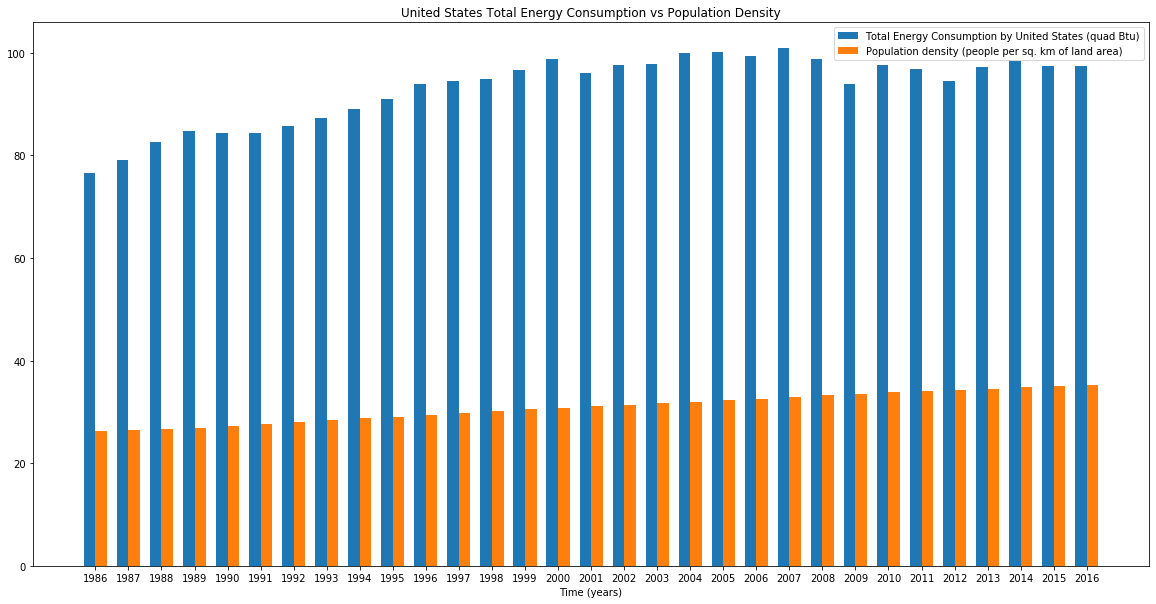

In [14]:
# Find total consumption and population density data
total_x, total_y = plot(total, "United States")
top_5_x, top_5_y = plot(pop_density_df, "United States")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
#top_5_y = [round(value/100,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,10))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by United States (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('United States Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

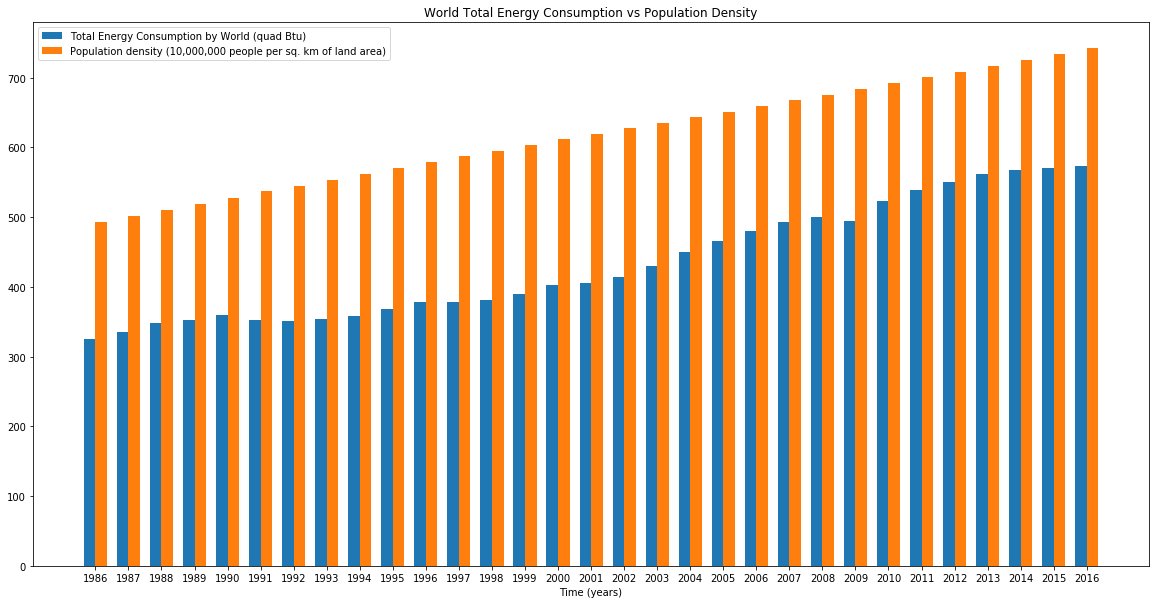

In [15]:
# Find total consumption and population density data
total_x, total_y = plot(total, "World")
top_5_x, top_5_y = plot(world, "World")

# Set labels, divide population density by 10,000 for better visual
labels = total_x
top_5_y = [round(value/10000000,2) for value in top_5_y]

# Set label locations and width of the bars
x = np.arange(len(labels))
width = 0.35

# Set the plot size and create the plotting area
fig, ax = plt.subplots(figsize=(20,10))

# Create the individual bars
rects1 = ax.bar(x - width/2, total_y, width, label='Total Energy Consumption by World (quad Btu)')
rects2 = ax.bar(x + width/2, top_5_y, width, label="Population density (10,000,000 people per sq. km of land area)")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel("Time (years)")
ax.set_title('World Total Energy Consumption vs Population Density')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

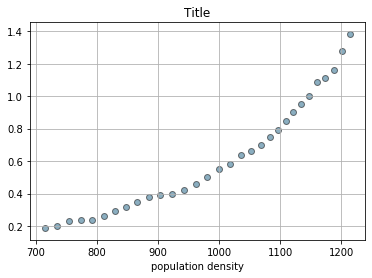

In [16]:
# Find total consumption and population density data
total_x, total_y = plot(total, "Bangladesh")
top_5_x, top_5_y = plot(pop_density_df, "Bangladesh")
plt.scatter(top_5_y , total_y, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("Title")
plt.xlabel("population density")
plt.grid()


The r-squared is: 0.9169653145121281

The correlation between both factors is 0.96


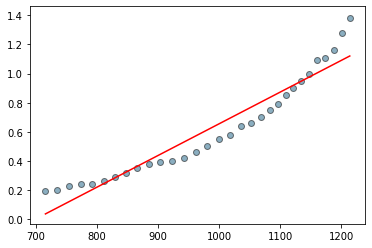

In [17]:
x_values = np.array(top_5_y)
y_values = np.array(total_y)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}\n")
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_equation,(6000000000,300),fontsize=15,color="red");
plt.ylabel("")
plt.xlabel("")
correlation = st.pearsonr(top_5_y, total_y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

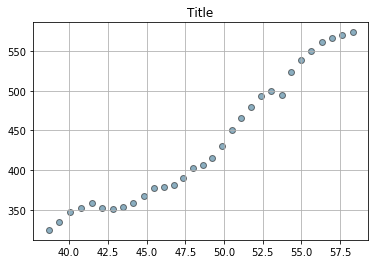

In [18]:
# Find total consumption and population density data
total1, total2 = plot(total, "World")
topx, topy = plot(pop_density_df, "World")
plt.scatter(topy , total2, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.title("Title")
plt.xlabel("")
plt.grid()

The r-squared is: 0.9459468090418464

The correlation between both factors is 0.97


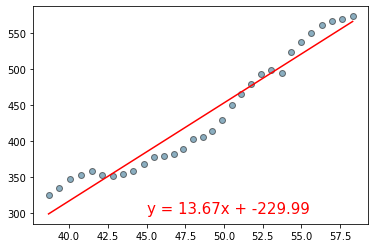

In [19]:
x_values = np.array(topy)
y_values = np.array(total2)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}\n")
plt.scatter(x_values,y_values, alpha=0.5, marker="o", color="#195e83", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_equation,(45,300),fontsize=15,color="red");
plt.ylabel("")
plt.xlabel("")
correlation = st.pearsonr(topy, total2)
print(f"The correlation between both factors is {round(correlation[0],2)}")